In [3]:
import pandas as pd
print(pd.__version__)

2.2.1


In [4]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas
from scipy.stats import norm ## distribución normal
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import t ## distribución t
from scipy.stats import f ## distribución F
from scipy.stats import ttest_1samp  ## Prueba t una población
from scipy.stats import ttest_ind ## Prueba t comparación medias
from scipy.stats import shapiro ## Prueba normalidad Shapiro-Wilks
from scipy.stats import anderson ## Prueba normalidad Anderson-Darling
from scipy.stats import levene ## Prueba homogeneidad de varianzas Levene
from scipy.stats import mannwhitneyu ## Prueba Mann-Whitney-Wilcoxon (comparación dos poblaciones)
from scipy.stats import f_oneway ## Prueba ANOVA de una vía
from scipy.stats import chi2_contingency ## Prueba chi cuadrado de Pearson
from scipy.stats import pearsonr ## Coeficiente de correlación de Pearson con prueba
import statsmodels.stats as sm  ## estadísticas
import statsmodels.api as sm1  ## estadísticas
from statsmodels.graphics.gofplots import qqplot ## Gráfico QQ plot
import pingouin as pg ## Librería funciones estadísticas

# 1. Pregunta SMART:

¿Cuál es el comportamiento que tienen los resultados de indicadores homonales de los hombres y mujeres en el desarrollo de enfermedad en la tiroides?

Específica --> Se acota dos factores importantes: 1. Me interesa analizar la información de hombres y mujeres - esto implica que me interesa agrupar la data de acuerdo a si se trata de conjunto hombres o conjunto mujeres. y, 2. Me interesa centrarme en las variables de los exámenes médicos obtenidos de ellos
Medible --> Por ahora en esta fase exploratoria no acoto a una medición en específico el EDA
Accionable --> Por ahora en esta fase exploratoria no acoto a una medición en específico el EDA
Relevante --> La importancia radica en que los resultados de los exámenes pueden implicar la presencia o no de una enfermedad
Tiempo --> Por ahora no se tiene acotado un tiempo


# 2. Obtener Datos

Dataset descargado de Kaggle: https://www.kaggle.com/datasets/kapoorprakhar/thyroid-disease-patient-dataset

Este conjunto de datos captura varios atributos relacionados con las afecciones de la tiroides para el diagnóstico médico. Incluye la siguiente información:

Demografía:

Age: Edad de la persona
sex: El sexo de la persona, Femenino (F) o Masculino(M) 

Historial médico: 

thyroxine/queryontrhyroxine: Hace rederencia a la ingesta de tiroxina (Levotiroxina - es decir medicamento para hiportiroidismo)
onantithyroidmedication: Hace referencia a la ingesta de medicamentos antitiroideos (Metimazol - es decir medicamentos para hipertiroidismo)
sick: Hace referencia a si está enfermo de la tiroides (Diagnosticado previamente)
pregnant: Hace referencia a si está embarazada o no
thyroidsurgery: Hace referencia a presencia de cirugías pasadas de la tiroides.
l131treatment: Hace referencia a si el paciente ha tenido o no terapia de yodo radioactivo para el hipertiroidismo
queryhypothyroid: Hace referencia a sospecha que el paciente tiene hipertiroidismo
queryhyperthyroid: Hace referencia a sospecha que el paciente tiene hipertiroidismo
lithium: Hace referencia a si el paciente tiene tratamiento con litio o no, el cual es para inhibir liberación de hormona tiroidea (Para hipotiroidismo)
goitre: Hace referencia a presencia de Bocio o no, que es un crecimiento anormal de la glándula de la tiroides
tumor: Hace referencia a presencia o no de tumores en la tiroides
hypopituitary: Hace referencia a la presencia o no de hipopituitarismo que es la falta de una o más hormonas hipofisarias que puede llevar a la perdida de función de una glándula. por ejemplo la TSH que es la hormona de la tiroides.
psych: Presencia o no de trastornos como hashimoto, grecie, etc

Exámenes:

TSHmeasured: Presencia o no de medición de la hormona TSH
TSH: Resultado del exámen de hormona TSH en el paciente
T3measured: Presencia o no de medición de la hormona T3
T3: Resultado del exámen de hormona T3 en el paciente
TT4measured: Presencia o no de medición de la hormona T4 Total
T4: Resultado del exámen de hormona T4 Total en el paciente
T4Umeasured: Presencia o no de medición de la hormona T4U (T4 Libre)
T4U: Resultado del exámen de hormona T4U (T4 Libre) en el paciente
FTImeasured: Presencia o no de medición de la hormona FTI
FTI: Resultado del exámen de hormona FTI en el paciente
TBGmeasured: Presencia o no de medición de la hormona TBG
TBG: Resultado del exámen de hormona TBG en el paciente
Referral source: Fuente de referencia de la tabla de referencia utilizada para la toma de examenes
binaryClass:Hace referencia a la presencia (P) o ausencia (N) de hipertiroidismo



# 3. Analizar Estructura
- visualizar tabla

In [5]:
## 3. Analizar Estructura
## Cargo los datos
data = pd.read_csv("hypothyroid.csv")
data.head(5)

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,binaryClass
0,12,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,?,SVHC,P
1,20,M,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,?,SVI,P


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3770 non-null   int64  
 1   sex                      3620 non-null   object 
 2   thyroxine                3770 non-null   object 
 3   queryonthyroxine         3770 non-null   object 
 4   onantithyroidmedication  3770 non-null   object 
 5   sick                     3770 non-null   object 
 6   pregnant                 3770 non-null   object 
 7   thyroidsurgery           3770 non-null   object 
 8   I131treatment            3770 non-null   object 
 9   queryhypothyroid         3770 non-null   object 
 10  queryhyperthyroid        3770 non-null   object 
 11  lithium                  3770 non-null   object 
 12  goitre                   3770 non-null   object 
 13  tumor                    3770 non-null   object 
 14  hypopituitary           

# 4. Dividir Variables
- Tipificación de las variables

In [7]:
variables = pd.read_excel("Descripcion_Variables.xlsx")
variables

,Variables,Tipo de Variable,Subtipo
0,Age,Numéricas,Discreta
1,sex,Categórica,Nominal
2,thyroxine,Categórica,Nominal
3,queryonthyroxine,Categórica,Nominal
4,onantithyroidmedication,Categórica,Nominal
5,sick,Categórica,Nominal
6,pregnant,Categórica,Nominal
7,thyroidsurgery,Categórica,Nominal
8,I131treatment,Categórica,Nominal
9,queryhypothyroid,Categórica,Nominal


# 5. Análisis Univariado Categóricas
- Limpieza de data (Reemplazar valores "?" por NaN)
- Limpieza de data (Reemplazar valores booleanos por 1 y 0)
- Verificar valores perdidos o nulos dentro de la data

In [9]:
# Limpieza de data (Reemplazar valores "?" por NaN)
data.replace("?", np.nan, inplace = True)
data.head(5)

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,binaryClass
0,12,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,20,M,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


En primer lugar se limpiaron los valores con signo "?" por NaN del examen TBG

In [11]:
# Limpieza de data (Reemplazar valores booleanos por 1 y 0)

data['thyroxine'] = data['thyroxine'].replace({"t": 1, "f": 0})
data['thyroxine'] = data['thyroxine'].astype(int)

data['queryonthyroxine'] = data['queryonthyroxine'].replace({"t": 1, "f": 0})
data['queryonthyroxine'] = data['queryonthyroxine'].astype(int)

data['onantithyroidmedication'] = data['onantithyroidmedication'].replace({"t": 1, "f": 0})
data['onantithyroidmedication'] = data['onantithyroidmedication'].astype(int)

data['sick'] = data['sick'].replace({"t": 1, "f": 0})
data['sick'] = data['sick'].astype(int)

data['pregnant'] = data['pregnant'].replace({"t": 1, "f": 0})
data['pregnant'] = data['pregnant'].astype(int)

data['thyroidsurgery'] = data['thyroidsurgery'].replace({"t": 1, "f": 0})
data['thyroidsurgery'] = data['thyroidsurgery'].astype(int)

data['I131treatment'] = data['I131treatment'].replace({"t": 1, "f": 0})
data['I131treatment'] = data['I131treatment'].astype(int)

data['queryhypothyroid'] = data['queryhypothyroid'].replace({"t": 1, "f": 0})
data['queryhypothyroid'] = data['queryhypothyroid'].astype(int)

data['queryhyperthyroid'] = data['queryhyperthyroid'].replace({"t": 1, "f": 0})
data['queryhyperthyroid'] = data['queryhyperthyroid'].astype(int)

data['lithium'] = data['lithium'].replace({"t": 1, "f": 0})
data['lithium'] = data['lithium'].astype(int)

data['goitre'] = data['goitre'].replace({"t": 1, "f": 0})
data['goitre'] = data['goitre'].astype(int)

data['tumor'] = data['tumor'].replace({"t": 1, "f": 0})
data['tumor'] = data['tumor'].astype(int)

data['hypopituitary'] = data['hypopituitary'].replace({"t": 1, "f": 0})
data['hypopituitary'] = data['hypopituitary'].astype(int)

data['psych'] = data['psych'].replace({"t": 1, "f": 0})
data['psych'] = data['psych'].astype(int)

data['TSHmeasured'] = data['TSHmeasured'].replace({"t": 1, "f": 0})
data['TSHmeasured'] = data['TSHmeasured'].astype(int)

data['T3measured'] = data['T3measured'].replace({"t": 1, "f": 0})
data['T3measured'] = data['T3measured'].astype(int)

data['TT4measured'] = data['TT4measured'].replace({"t": 1, "f": 0})
data['TT4measured'] = data['TT4measured'].astype(int)

data['T4Umeasured'] = data['T4Umeasured'].replace({"t": 1, "f": 0})
data['T4Umeasured'] = data['T4Umeasured'].astype(int)

data['TBGmeasured'] = data['TBGmeasured'].replace({"t": 1, "f": 0})
data['TBGmeasured'] = data['TBGmeasured'].astype(int)

data['FTImeasured'] = data['FTImeasured'].replace({"t": 1, "f": 0})
data['FTImeasured'] = data['FTImeasured'].astype(int)

data['binaryClass'] = data['binaryClass'].replace({"P": 1, "N": 0})
data['binaryClass'] = data['binaryClass'].astype(int)


In [12]:
data.head(5)

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,binaryClass
0,12,F,0,0,0,0,0,0,0,0,...,1,125.0,1,1.14,1,109.0,0,NaN,SVHC,1
1,20,M,0,0,0,0,0,0,0,0,...,1,102.0,0,0.00,0,0.0,0,NaN,other,1
2,46,M,0,0,0,0,0,0,0,0,...,1,109.0,1,0.91,1,120.0,0,NaN,other,1
3,70,F,1,0,0,0,0,0,0,0,...,1,175.0,0,0.00,0,0.0,0,NaN,other,1
4,70,F,0,0,0,0,0,0,0,0,...,1,61.0,1,0.87,1,70.0,0,NaN,SVI,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3770 non-null   int64  
 1   sex                      3620 non-null   object 
 2   thyroxine                3770 non-null   int64  
 3   queryonthyroxine         3770 non-null   int64  
 4   onantithyroidmedication  3770 non-null   int64  
 5   sick                     3770 non-null   int64  
 6   pregnant                 3770 non-null   int64  
 7   thyroidsurgery           3770 non-null   int64  
 8   I131treatment            3770 non-null   int64  
 9   queryhypothyroid         3770 non-null   int64  
 10  queryhyperthyroid        3770 non-null   int64  
 11  lithium                  3770 non-null   int64  
 12  goitre                   3770 non-null   int64  
 13  tumor                    3770 non-null   int64  
 14  hypopituitary           

In [14]:
#Verificar valores perdidos
missing_data = data.isnull()
missing_data.head(5)

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,binaryClass
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:
data.isna().sum()

Age                           0
sex                         150
thyroxine                     0
queryonthyroxine              0
onantithyroidmedication       0
sick                          0
pregnant                      0
thyroidsurgery                0
I131treatment                 0
queryhypothyroid              0
queryhyperthyroid             0
lithium                       0
goitre                        0
tumor                         0
hypopituitary                 0
psych                         0
TSHmeasured                   0
TSH                           0
T3measured                    0
T3                            0
TT4measured                   0
T4                            0
T4Umeasured                   0
T4U                           0
FTImeasured                   0
FTI                           0
TBGmeasured                   0
TBG                        3770
referral source               0
binaryClass                   0
dtype: int64

Analizando los valores perdidos me di cuenta que los valores que contienen NaN son el sexo y el examen TBG. Para el sexo están 150 datos como NaN y para TBG ninguno de sus valores existe y son 3770 NaN

Para este caso en particular yo optaría por no imputar valores en estos dos campos, por un lado uno de los campos es un examen TBG que no se puede estimar con base en los resultados de otros pacientes y además es un campo vacio en la totalidad del dataset, entonces no es sencillo estimarlo para toda la población sin entender su comportamiento con otros datos de referencia (En caso que se pudiera imputar)

y por otro lado tampoco sería bueno imputar el sexo de los pacientes que tienen información por la misma razón, de tratarse de información médica y que asumir el sexo de alguien puede tener repercusiones en el tratamiento, etc.

Por lo tanto opté por eliminar los valores vacios de sexo en un archivo copia ya que mi interés es analizar la información de hombres y mujeres y sino tengo este dato no puedo asumir su sexo

In [38]:
data2 = data
# Seleccionar filas sin valores en la columna "sex"
data2 = data2[~data2['sex'].isnull()]

# Eliminar filas con valores en cero
data2.isna().sum()

Age                           0
sex                           0
thyroxine                     0
queryonthyroxine              0
onantithyroidmedication       0
sick                          0
pregnant                      0
thyroidsurgery                0
I131treatment                 0
queryhypothyroid              0
queryhyperthyroid             0
lithium                       0
goitre                        0
tumor                         0
hypopituitary                 0
psych                         0
TSHmeasured                   0
TSH                           0
T3measured                    0
T3                            0
TT4measured                   0
T4                            0
T4Umeasured                   0
T4U                           0
FTImeasured                   0
FTI                           0
TBGmeasured                   0
TBG                        3620
referral source               0
binaryClass                   0
dtype: int64

In [17]:
data2.head(20)

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,binaryClass
0,12,F,0,0,0,0,0,0,0,0,...,1,125.0,1,1.14,1,109.0,0,NaN,SVHC,1
1,20,M,0,0,0,0,0,0,0,0,...,1,102.0,0,0.00,0,0.0,0,NaN,other,1
2,46,M,0,0,0,0,0,0,0,0,...,1,109.0,1,0.91,1,120.0,0,NaN,other,1
3,70,F,1,0,0,0,0,0,0,0,...,1,175.0,0,0.00,0,0.0,0,NaN,other,1
4,70,F,0,0,0,0,0,0,0,0,...,1,61.0,1,0.87,1,70.0,0,NaN,SVI,1
5,18,F,1,0,0,0,0,0,0,0,...,1,183.0,1,1.30,1,141.0,0,NaN,other,1
6,59,F,0,0,0,0,0,0,0,0,...,1,72.0,1,0.92,1,78.0,0,NaN,other,1
7,80,F,0,0,0,0,0,0,0,0,...,1,80.0,1,0.70,1,115.0,0,NaN,SVI,1
8,66,F,0,0,0,0,0,0,0,0,...,1,123.0,1,0.93,1,132.0,0,NaN,SVI,1
9,68,M,0,0,0,0,0,0,0,0,...,1,83.0,1,0.89,1,93.0,0,NaN,SVI,1


In [18]:
## Función para construir tablas de frecuencias
def tabla_freq(columna):
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

In [19]:
tabla_aprob = tabla_freq(data2['sex'])
tabla_aprob

col_0,sex,Frec. Abs.,Frec. Rel.
0,F,2477,0.684254
1,M,1143,0.315746


Por un lado, se analizó el porcentaje de hombre sy mujeres del dataset

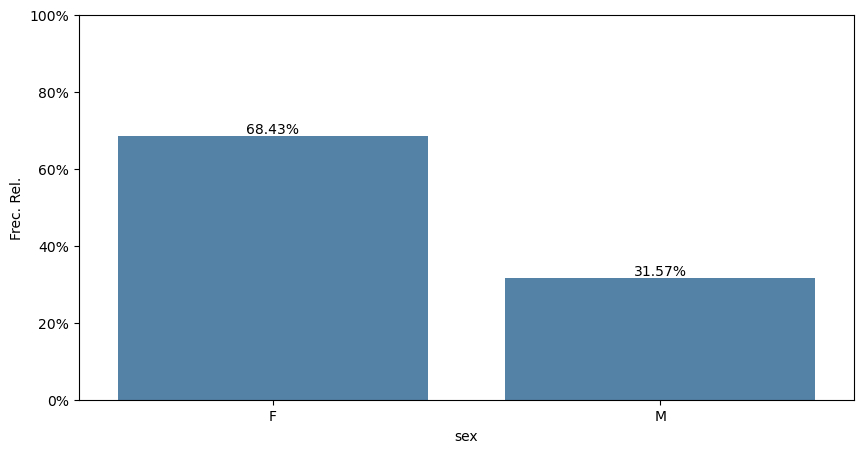

In [20]:
plt.figure(figsize=(10,5)) 
frec_aprob=sns.barplot(x=tabla_aprob['sex'],y=tabla_aprob["Frec. Rel."]*100, color="steelblue") ## aquí es el cambio
frec_aprob.bar_label(frec_aprob.containers[0], label_type='edge',fmt='%.2f%%')  
frec_aprob.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
frec_aprob.set(ylim=(0, 100))
plt.show()  

Se puede observar que la información principalmente contiene información de mujeres. Podría profundizarse si los problemas de tiroides son más propensos de ocurrir en las mujeres que en los hombres
(Otra posible pregunta a investigar) --> aunque se necesitaria otras bases de datos posiblemente, no solo este dataset podría responder esta pregunta

# 6. Análisis univariado numérico

- Análisis de variables estadísticas

In [21]:
# Análisis de variables estadísticas

print("Estadística general de exámenes")
#Tabla descriptiva para variable TSH
columnas_seleccionadas = ['TSH', 'T3', 'T4U']
tabla2 = data[columnas_seleccionadas].describe()
tabla2

Estadística general de exámenes


,TSH,T3,T4U
count,3770.000000,3770.000000,3770.000000
mean,4.591025,1.603008,0.892921
std,23.345886,1.097207,0.354295
min,0.000000,0.000000,0.000000
25%,0.200000,0.900000,0.840000
50%,1.200000,1.800000,0.950000
75%,2.475000,2.200000,1.070000
max,530.000000,10.600000,2.320000


La función describe() permite ver un resumen de las variables estadísticas para los exámenes médicos de las personas. Sin embargo, como mi interés era ver el comportamiento en primer lugar por conjunto de Hombres y Mujeres, entonces opté por construir una tabla de variables estadísticas por sexo.

In [39]:
# Seleccionar filas sin valores en cero en la columna "TSH"
filas_sin_cero = data2["TSHmeasured"].isin([0])

# Eliminar filas con valores en cero
data3 = data2[~filas_sin_cero]

In [44]:
# Análisis de variables estadísticas

print("Medición TSH Libre")
data_grupo = data3.groupby("sex")
#Tabla descriptiva para variable TSH
tabla1 = pd.DataFrame(data_grupo['TSH'].describe())
tabla1 = tabla1.assign(coef_variation= tabla1['std']/tabla1['mean'])
for grupo in data_grupo:
    tabla1.loc[grupo[0], 'skew'] = grupo[1]['TSH'].skew()
    tabla1.loc[grupo[0], 'kurtosis'] = grupo[1]['TSH'].kurtosis()        
tabla1

Medición TSH Libre


,count,mean,std,min,25%,50%,75%,max,coef_variation,skew,kurtosis
sex,,,,,,,,,,,
F,2218.0,5.581655,26.753853,0.005,0.420,1.4,2.9,530.0,4.793176,13.171231,210.304969
M,1050.0,3.793748,14.873341,0.005,0.555,1.3,2.3,236.0,3.920488,9.846619,115.530703


Explicación Coeficiente de Variación, Skew y Kurtosis: 

El coeficiente de variación de los datos indica que la media aritmética no es representativa en el conjunto de datos segmentados por sexo.
El Skew indica que los datos cuentan con una distribución sesgada a la derecha. 
La Kurtosis indica una elevación relativa en la distribución de los datos.

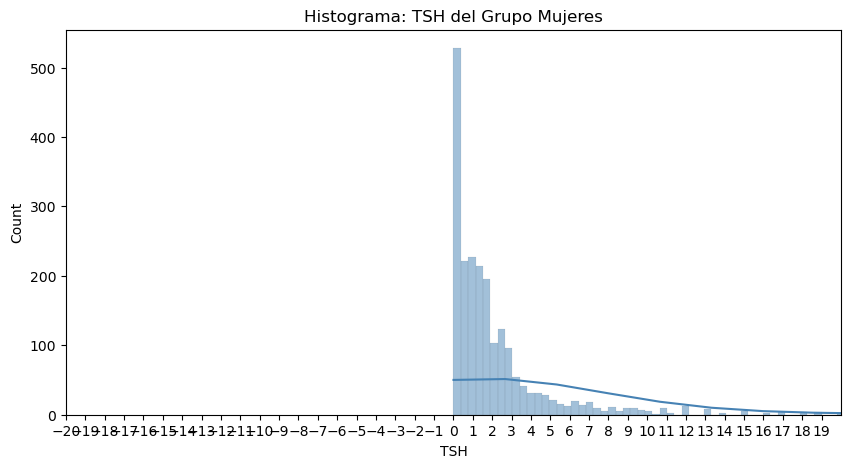

In [45]:
data_2 = data3[data3["sex"] == "F"]
plt.figure(figsize=(10,5)) 
hist_data_2=sns.histplot(x=data_2['TSH'],kde=True,color="steelblue") ## crea el boxplot
hist_data_2.set_xlabel('TSH') ## cambia el título del eje x
hist_data_2.set_xlim(-20, 20)                     ## cambia los límites del eje x
hist_data_2.set_xticks(range(-20,20,1))             ## cambia los valores del eje x
hist_data_2.set_title('Histograma: TSH del Grupo Mujeres')
plt.show()

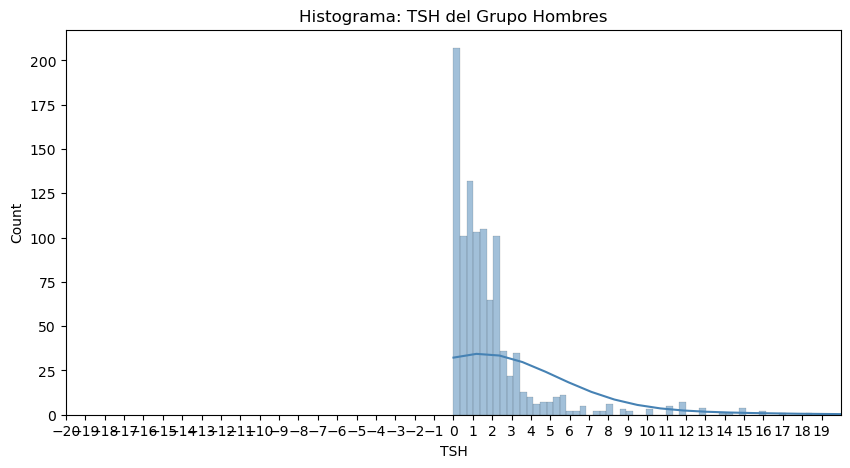

In [43]:
data_3 = data3[data3["sex"] == "M"]
plt.figure(figsize=(10,5)) 
hist_data_3=sns.histplot(x=data_3['TSH'],kde=True,color="steelblue") ## crea el boxplot
hist_data_3.set_xlabel('TSH') ## cambia el título del eje x
hist_data_3.set_xlim(-20, 20)                     ## cambia los límites del eje x
hist_data_3.set_xticks(range(-20,20,1))             ## cambia los valores del eje x
hist_data_3.set_title('Histograma: TSH del Grupo Hombres')
plt.show()

Escogí la variable TSH por ser la hormona de principal seguimiento para la funcionalidad de la hormona tiroidea. En estos histogramas se puede observar que la información tiene una media realmente cerca al cero y tiene que ver con los valores de referencia donde las enfermedades relacionadas con problemas de tiroides implican TSH bajas cercana al cero sobre todo en patologías tipo Hipertiroidismo

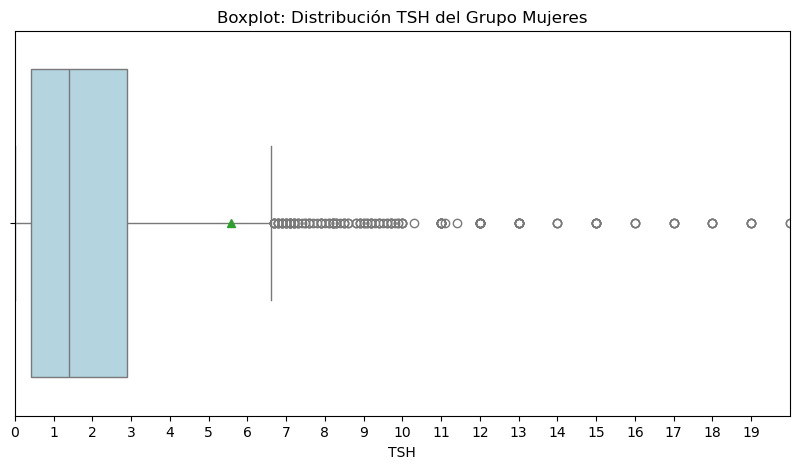

In [42]:
data_1 = data3[data3["sex"] == "F"]
plt.figure(figsize=(10,5)) 
boxplot_data_1=sns.boxplot(x=data_1['TSH'],color="lightblue",showmeans=True) ## crea el boxplot
boxplot_data_1.set_xlabel('TSH') ## cambia el título del eje x
boxplot_data_1.set_xlim(0, 20)                     ## cambia los límites del eje x
boxplot_data_1.set_xticks(range(0,20,1))               ## cambia los valores del eje x
boxplot_data_1.set_title('Boxplot: Distribución TSH del Grupo Mujeres')
plt.show()

De acá se puede analizar por ejemplo en el grupo más grande que es el de mujeres, hay varios valores anomalos por fuera de la media. Además se observa que la media está por fuera de la densidad de datos y eso podría implicar que los datos de este valor no siguen un comportamiento normal, lo que se puede ver también en el histograma y posiblemente valores como la mediana son más acertados que la media.

In [47]:
data_2['TSH'].median()

1.4

Como se puede ver la mediana si está dentro de la caja en el boxplot

In [48]:
# Seleccionar filas sin valores en cero en la columna "TSH"
filas_sin_cero = data2["T4Umeasured"].isin([0])

# Eliminar filas con valores en cero
data4 = data2[~filas_sin_cero]

In [49]:
print("Medición T4 Libre")
data2_grupo = data4.groupby("sex")
#Tabla descriptiva para variable T4 libre (FTI)
tabla2 = pd.DataFrame(data2_grupo['T4U'].describe())
tabla2 = tabla2.assign(coef_variation= tabla2['std']/tabla2['mean'])
for grupo in data_grupo:
    tabla2.loc[grupo[0], 'skew'] = grupo[1]['T4U'].skew()
    tabla2.loc[grupo[0], 'kurtosis'] = grupo[1]['T4U'].kurtosis()        
tabla2

Medición T4 Libre


,count,mean,std,min,25%,50%,75%,max,coef_variation,skew,kurtosis
sex,,,,,,,,,,,
F,2201.0,1.028212,0.206620,0.31,0.90,1.00,1.11,2.32,0.200950,-1.041495,4.411601
M,1052.0,0.927329,0.147959,0.25,0.83,0.92,1.02,1.68,0.159554,-1.959886,5.126165


Por otro lado se analizó también le comportamiento de los datos del resultado T4 libre que es segundo examen que comunmente se mira para determinar enfermedades relacionadas con el funcionamiento de la tiroides

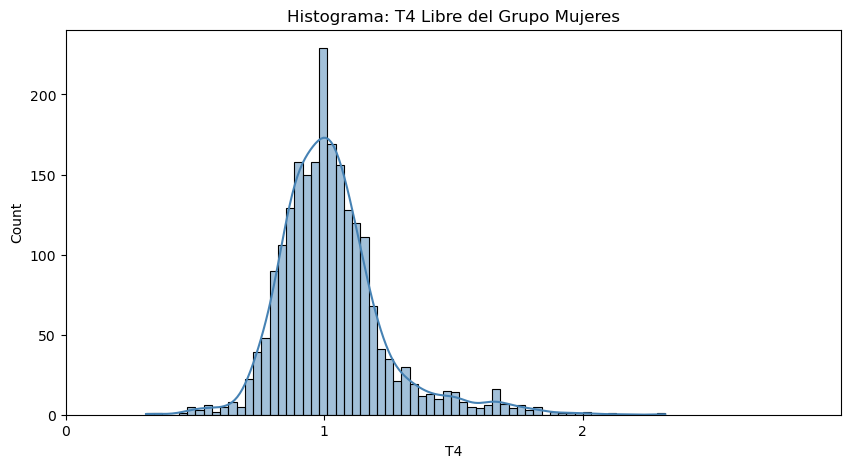

In [50]:
data_4 = data4[data4["sex"] == "F"]
plt.figure(figsize=(10,5)) 
hist_data_4=sns.histplot(x=data_4['T4U'],kde=True,color="steelblue") ## crea el boxplot
hist_data_4.set_xlabel('T4') ## cambia el título del eje x
hist_data_4.set_xlim(0, 3)                     ## cambia los límites del eje x
hist_data_4.set_xticks(range(0,3,1))             ## cambia los valores del eje x
hist_data_4.set_title('Histograma: T4 Libre del Grupo Mujeres')
plt.show()

Como se observa, a diferencia de la TSH, esta variable si parece tener un comportamiento normal con una media de 1 y un poco de sesgo a la derecha

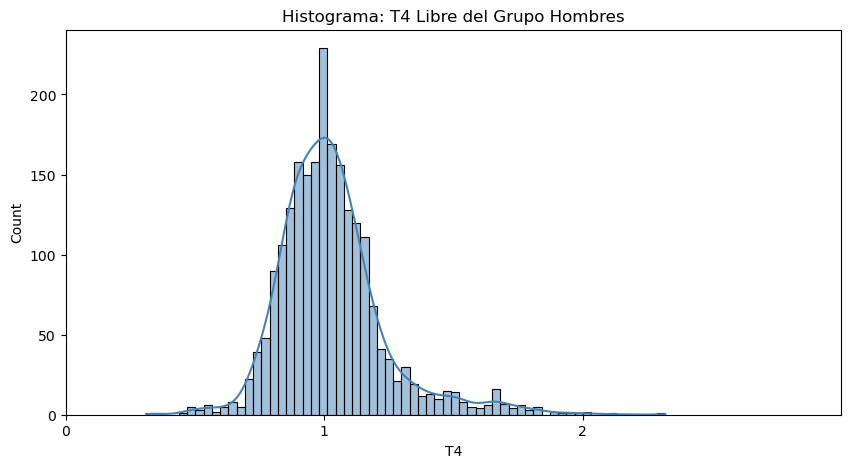

In [51]:
data_5 = data4[data4["sex"] == "M"]
plt.figure(figsize=(10,5)) 
hist_data_5=sns.histplot(x=data_4['T4U'],kde=True,color="steelblue") ## crea el boxplot
hist_data_5.set_xlabel('T4') ## cambia el título del eje x
hist_data_5.set_xlim(0, 3)                     ## cambia los límites del eje x
hist_data_5.set_xticks(range(0,3,1))             ## cambia los valores del eje x
hist_data_5.set_title('Histograma: T4 Libre del Grupo Hombres')
plt.show()

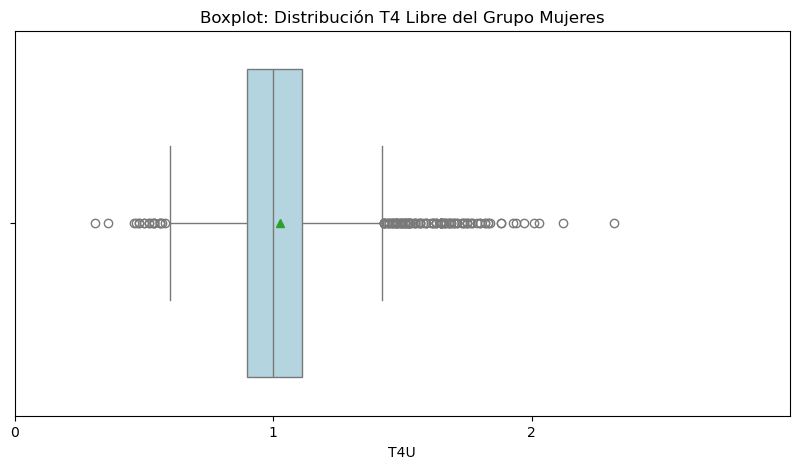

In [53]:
data_4 = data4[data4["sex"] == "F"]
plt.figure(figsize=(10,5)) 
boxplot_data_1=sns.boxplot(x=data_4['T4U'],color="lightblue",showmeans=True) ## crea el boxplot
boxplot_data_1.set_xlabel('T4U') ## cambia el título del eje x
boxplot_data_1.set_xlim(0, 3)                     ## cambia los límites del eje x
boxplot_data_1.set_xticks(range(0,3,1))               ## cambia los valores del eje x
boxplot_data_1.set_title('Boxplot: Distribución T4 Libre del Grupo Mujeres')
plt.show()

# 7. Analisis de Correlación

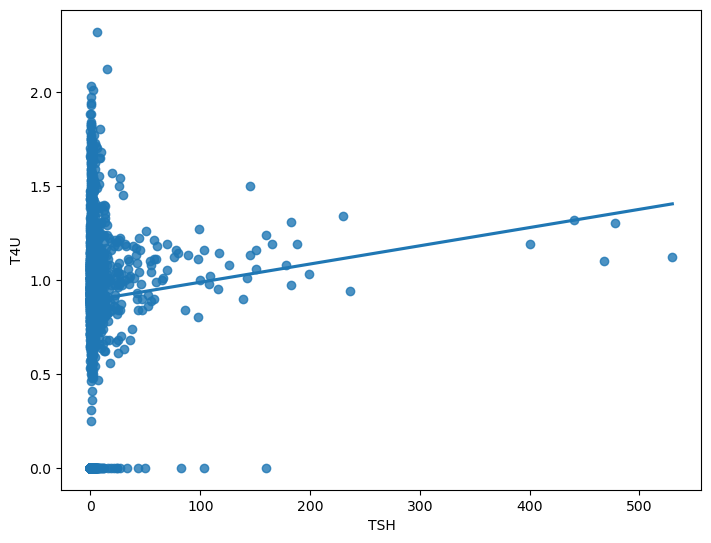

In [60]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.regplot(x=data2["TSH"],y=data2["T4U"],ci=None)   
plt.ylabel('T4U')  
plt.xlabel('TSH')         
plt.show()

No pude graficar la linea que mejor represente el comportamiento de los datos. Según yo no hay ninguna relación entre ambas. 

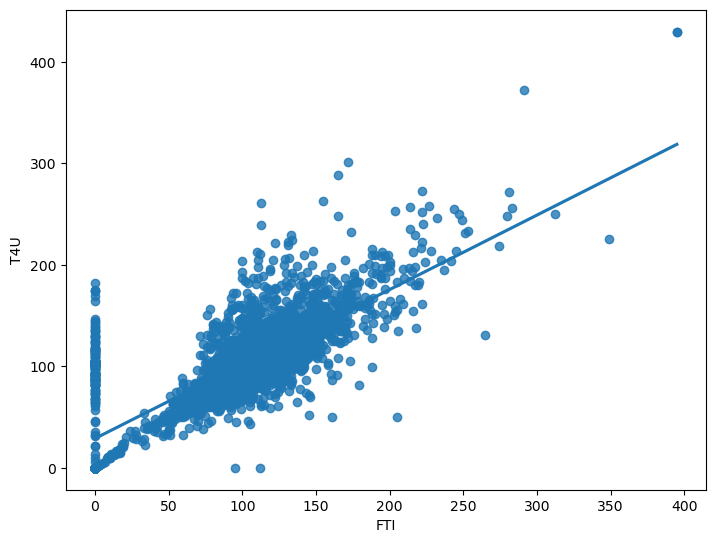

In [66]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.regplot(x=data2["FTI"],y=data2["T4"],ci=None)   
plt.ylabel('T4U')  
plt.xlabel('FTI')         
plt.show()

Estos gráficos de correlación significa que las variables T4 y T4U están correlacionadas con el FTI y según mi juicio se trata de una correlación lineal positiva

In [62]:
# Pipeline
from sklearn.pipeline import Pipeline
# Support Vector Classifier
from sklearn.svm import SVC
# Scaler
from sklearn.preprocessing import StandardScaler
# Splitter
from sklearn.model_selection import train_test_split

In [63]:
data2_dum = pd.get_dummies(data2, columns=['sex'], prefix=['sex_es'])
data2_dum.dtypes
#data2_dum.head()

Age                          int64
thyroxine                    int64
queryonthyroxine             int64
onantithyroidmedication      int64
sick                         int64
pregnant                     int64
thyroidsurgery               int64
I131treatment                int64
queryhypothyroid             int64
queryhyperthyroid            int64
lithium                      int64
goitre                       int64
tumor                        int64
hypopituitary                int64
psych                        int64
TSHmeasured                  int64
TSH                        float64
T3measured                   int64
T3                         float64
TT4measured                  int64
T4                         float64
T4Umeasured                  int64
T4U                        float64
FTImeasured                  int64
FTI                        float64
TBGmeasured                  int64
TBG                        float64
referral source             object
binaryClass         

In [64]:
# Dividimos en test y train
x = data2_dum[["Age", "sex_es_F", "sex_es_M"]]
y = data2_dum["FTI"]

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [65]:
from sklearn.linear_model import LinearRegression


# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
    ])

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.003490747978194042